# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

In [21]:
pip install bokeh==2.0.1

     ---------------------------------------- 8.6/8.6 MB 375.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080026 sha256=75f59654d64d2d777e64ed8b3259d8e10ec04f0a5cac2214f3f51a2ebd0ae208
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\00\1b\23\26649f4d0923cdfb0b6445e3d10d262a4824747b942a592dd1
Successfully built bokeh
Note: you may need to restart the kernel to use updated packages.


In [1]:
import kaggle

In [4]:
!kaggle competitions download -c bike-sharing-demand


  0%|          | 0.00/189k [00:00<?, ?B/s]
100%|##########| 189k/189k [00:00<00:00, 306kB/s]
100%|##########| 189k/189k [00:00<00:00, 306kB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [27]:
import numpy as np

In [50]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('data/train.csv')
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [51]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [52]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('data/test.csv')
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [53]:
# Same thing as train and test dataset
submission = pd.read_csv('data/sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [54]:
train.drop(['casual','registered'],axis=1,inplace=True)

In [55]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

In [56]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train, time_limit= 10*60, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220902_220133\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220902_220133\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator

KeyboardInterrupt: 

### Review AutoGluon's training run with ranking of models that did the best.

In [10]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.257112      12.929147  366.492439                0.000000           0.235512            3       True         22
1   NeuralNetFastAI_BAG_L2  -51.272288      11.861319  267.756280                0.296489          22.385300            2       True         18
2   RandomForestMSE_BAG_L2  -53.430250      11.982179  251.280609                0.417350           5.909628            2       True         15
3     ExtraTreesMSE_BAG_L2  -54.023319      11.976223  247.310938                0.411393           1.939958            2       True         17
4     LightGBMLarge_BAG_L2  -54.852476      11.781393  252.154891                0.216563           6.783910            2       True         21
5          LightGBM_BAG_L2  -54.910914      11.737442  248.942029         

C:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

### Create predictions from test dataset

In [11]:
predictions =predictor.predict(test)

predictions.head()

C:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


0    24.216393
1    40.614311
2    46.007603
3    47.458683
4    49.840912
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.750961
std        88.438271
min        -0.903439
25%        21.550217
50%        66.916191
75%       168.007385
max       349.708832
Name: count, dtype: float64

In [25]:
# How many negative values do we have?
b=np.array(predictions)
print(sum(b<0))

2


In [35]:
# Set them to zero
predictions=np.where(predictions < 0.0, 0, predictions)

In [36]:
b=np.array(predictions)
print(sum(b<0))

0


In [38]:
predictions= pd.DataFrame(predictions)

In [41]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6493 non-null   float32
dtypes: float32(1)
memory usage: 25.5 KB


In [42]:
predictions.describe()

0
count  6493.000000
mean     99.751228
std      88.437981
min       0.000000
25%      21.550217
50%      66.916191
75%     168.007385
max     349.708832

### Set predictions to submission dataframe, save, and submit

In [43]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [44]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand


  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|4         | 8.00k/195k [00:00<00:08, 21.6kB/s]
 41%|####1     | 80.0k/195k [00:00<00:00, 213kB/s] 
 66%|######5   | 128k/195k [00:00<00:00, 233kB/s] 
 99%|#########8| 192k/195k [00:00<00:00, 315kB/s]
100%|##########| 195k/195k [00:03<00:00, 55.2kB/s]


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'tail' is not recognized as an internal or external command,
operable program or batch file.


#### Initial score of `1.806441.80644`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

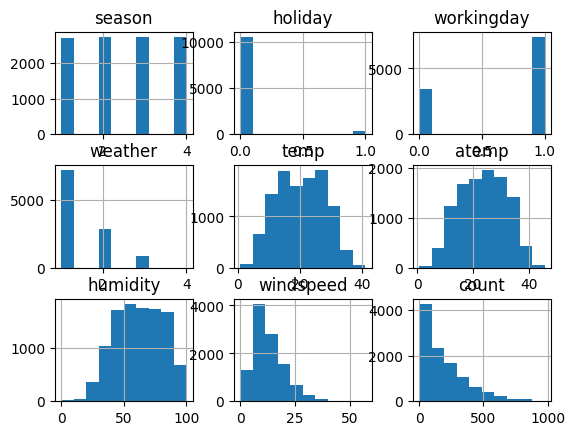

In [9]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist();

In [10]:
train['datetime']=pd.to_datetime(train['datetime'])

In [11]:
test['datetime']=pd.to_datetime(test['datetime'])

In [12]:
train.datetime.dtype

dtype('<M8[ns]')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [14]:
# create a new feature
train['weekday'] = train['datetime'].dt.dayofweek
test['weekday'] = test['datetime'].dt.dayofweek

In [15]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  weekday  
0        81        0.0     16        5  
1        80        0.0     40        5  
2        80        0.0     32        5  
3        75        0.0     13        5  
4        75        0.0      1        5

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [16]:
train["season"] = train.season.astype('category')
train["weather"] = train.weather.astype('category')
train['weekday'] = train.weekday.astype('category')
test['weekday'] = test.weekday.astype('category')
test["season"] = test.season.astype('category')
test["weather"] = test.weather.astype('category')

In [17]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count weekday  
0        81        0.0     16       5  
1        80        0.0     40       5  
2        80        0.0     32       5  
3        75        0.0     13       5  
4        75        0.0      1       5

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

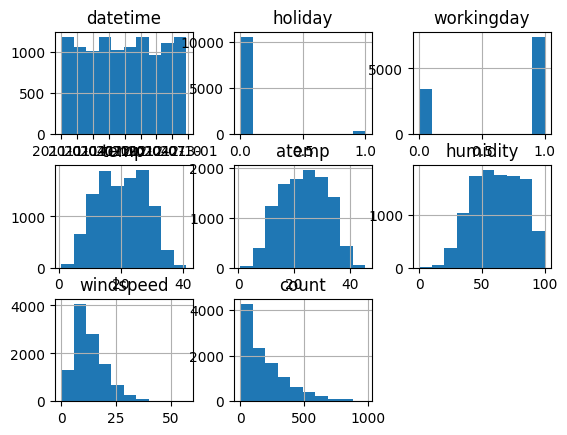

In [18]:
# View histogram of all features again now with the new feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [19]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train, time_limit= 10*60, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220902_205304\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220902_205304\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerato

In [22]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.716886      12.965063  397.039448                0.000000           0.217050            3       True         20
1   NeuralNetFastAI_BAG_L2  -52.392568      12.158018  389.859026                0.334090          20.687970            2       True         17
2   RandomForestMSE_BAG_L2  -53.028670      12.226212  374.557781                0.402284           5.386725            2       True         14
3     ExtraTreesMSE_BAG_L2  -54.024953      12.228688  370.747704                0.404760           1.576648            2       True         16
4          LightGBM_BAG_L2  -54.667035      12.026694  372.968209                0.202766           3.797153            2       True         13
5           XGBoost_BAG_L2  -54.921636      11.937957  375.573048         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleMode

In [24]:
predictions =predictor_new_features.predict(test)

predictions.head()

C:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


0    21.664917
1    38.891357
2    44.282181
3    46.112419
4    48.258797
Name: count, dtype: float32

In [25]:
predictions.describe()

count    6493.000000
mean       99.635452
std        88.495079
min        -2.982982
25%        22.031036
50%        68.172020
75%       166.278473
max       355.339722
Name: count, dtype: float64

In [28]:
# Remember to set all negative values to zero
b=np.array(predictions)
print(sum(b<0))

37


In [29]:
predictions=np.where(predictions < 0.0, 0, predictions)

In [30]:
b=np.array(predictions)
print(sum(b<0))

0


In [33]:
submission_new_features= pd.read_csv('data/sampleSubmission.csv')

In [34]:
# Same submitting predictions
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|4         | 8.00k/195k [00:00<00:06, 27.8kB/s]
 41%|####1     | 80.0k/195k [00:00<00:00, 181kB/s] 
 53%|#####3    | 104k/195k [00:01<00:01, 64.8kB/s]
 99%|#########8| 192k/195k [00:01<00:00, 143kB/s] 
100%|##########| 195k/195k [00:11<00:00, 17.2kB/s]


In [36]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'tail' is not recognized as an internal or external command,
operable program or batch file.


#### New Score of `1.82964`

In [38]:
test.to_csv('data/test_newf.csv',index=False)

In [39]:
train.to_csv('data/train_newf.csv',index=False)

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [40]:
train=pd.read_csv('data/train_newf.csv')
test=pd.read_csv('data/test_newf.csv')

In [41]:
predictor_new_hpo =TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train, time_limit= 20*60, presets="best_quality",auto_stack=True, num_bag_folds=5)

No path specified. Models will be saved in: "AutogluonModels/ag-20220902_213605\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20220902_213605\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerat

In [42]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.447443      12.938965  811.944780                0.000000           0.234972            3       True         22
1   NeuralNetFastAI_BAG_L2  -51.635259      11.510640  599.881316                0.641904          49.096963            2       True         18
2    NeuralNetTorch_BAG_L2  -52.994739      11.525886  757.653701                0.657150         206.869348            2       True         20
3   RandomForestMSE_BAG_L2  -53.269611      11.256824  554.513712                0.388088           3.729359            2       True         15
4     LightGBMLarge_BAG_L2  -53.688003      11.315271  565.865470                0.446535          15.081117            2       True         21
5     ExtraTreesMSE_BAG_L2  -53.892333      11.251824  552.014137         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [45]:
predictions_new_hpo=predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    27.736942
1    42.858185
2    47.638504
3    51.077156
4    53.462929
Name: count, dtype: float32

In [46]:
predictions_new_hpo.describe()

count    6493.000000
mean       98.938354
std        88.699501
min         2.643542
25%        20.609823
50%        64.523506
75%       166.785385
max       350.536316
Name: count, dtype: float64

# No negetive values

In [47]:
# Same submitting predictions
submission_new_hpo= pd.read_csv('data/sampleSubmission.csv')
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|4         | 8.00k/195k [00:00<00:04, 47.1kB/s]
 49%|####9     | 96.0k/195k [00:00<00:00, 375kB/s] 
 74%|#######3  | 144k/195k [00:00<00:00, 282kB/s] 
 90%|######### | 176k/195k [00:00<00:00, 258kB/s]
100%|##########| 195k/195k [00:02<00:00, 92.7kB/s]


In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `1.79506`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

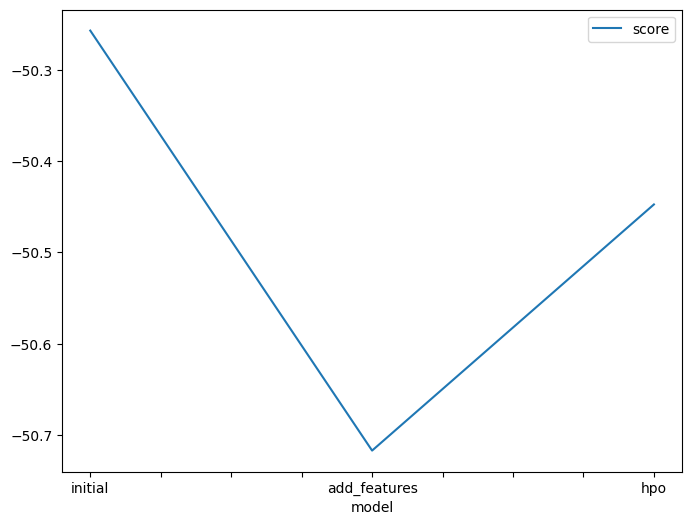

In [57]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-50.257112 , -50.716886, -50.447443]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

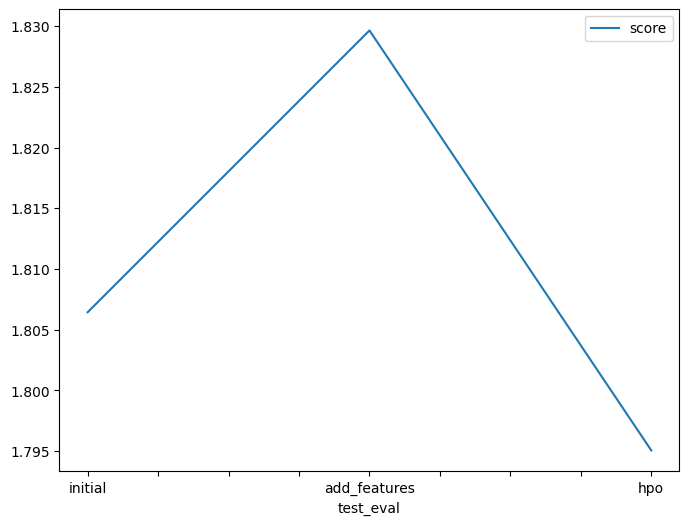

In [58]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80644, 1.82964, 1.79506]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [59]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['best_quility', 'time_limit_10m', 'none'],
    "hpo2": ['best_quility', 'time_limit_10m', 'none'],
    "hpo3": ['auto_stack=True','time_limit_20m' , 'num_bag_folds=5'],
    "score": [1.80644, 1.82964, 1.79506]
})

model            hpo1            hpo2             hpo3    score
0       initial    best_quility    best_quility  auto_stack=True  1.80644
1  add_features  time_limit_10m  time_limit_10m   time_limit_20m  1.82964
2           hpo            none            none  num_bag_folds=5  1.79506